FCI script for h2 and h3 test systems to confirm Ucasscf

In [2]:
from pyscf import gto, scf, mcscf, fci
import numpy as np
import matplotlib.pyplot as plt

Let's start with h2- 

In [10]:
Euhf_H2 = []
Eucas_H2 = []
Efci_H2 = []
mo = None

for a in np.arange(0.8, 4.05, 0.05):
    H2minus = gto.M(atom=[["H", 0, 0, 0],
                          [ "H", a, 0, 0]], basis = '6-31g', charge = -1, spin = 1)
    uhf =scf.UHF(H2minus)
    Euhf_H2.append(uhf.kernel())
    ncas, nelecas = (4, (2, 1))
    ucas = mcscf.UCASSCF(uhf, ncas, nelecas)
    if mo is not None:
        mo = mcscf.project_init_guess(ucas, mo)
    Eucas_H2.append(ucas.mc1step(mo)[0])
    fcisolver = fci.FCI(uhf)
    Efci_H2.append(fcisolver.kernel()[0])




converged SCF energy = -0.908090228758914  <S^2> = 0.75018744  2S+1 = 2.0001874


UCASSCF energy = -0.925954897746951
UCASCI E = -0.925954897746951  E(CI) = -1.58742641139695  S^2 = 0.7500000
converged SCF energy = -0.916675981394555  <S^2> = 0.75003402  2S+1 = 2.000034
UCASSCF energy = -0.93408392524225
UCASCI E = -0.93408392524225  E(CI) = -1.55664534985401  S^2 = 0.7500000
converged SCF energy = -0.923591974501322  <S^2> = 0.75000375  2S+1 = 2.0000038
UCASSCF energy = -0.940552980480804
UCASCI E = -0.940552980480804  E(CI) = -1.5285276592808  S^2 = 0.7500000
converged SCF energy = -0.929231188774968  <S^2> = 0.75008978  2S+1 = 2.0000898
UCASSCF energy = -0.945772287966844
UCASCI E = -0.945772287966844  E(CI) = -1.50280093104053  S^2 = 0.7500000
converged SCF energy = -0.933869322272991  <S^2> = 0.75027825  2S+1 = 2.0002782
UCASSCF energy = -0.950030183334807
UCASCI E = -0.950030183334807  E(CI) = -1.47920739425481  S^2 = 0.7500000
converged SCF energy = -0.937701326981335  <S^2> = 0.75055173  2S+1 = 2.0005517
UCASSCF energy = -0.953529873350026
UCASCI E = -0.9535

In [17]:
#let's do the same for sto-3g

Euhfs_H2 = []
Eucass_H2 = []
Efcis_H2 = []
mo = None

for a in np.arange(0.8, 4.05, 0.05):
    H2minus = gto.M(atom=[["H", 0, 0, 0],
                          [ "H", a, 0, 0]], basis = 'sto-3g', charge = -1, spin = 1)
    uhf =scf.UHF(H2minus)
    Euhfs_H2.append(uhf.kernel())
    ncas, nelecas = (2, (2, 1))
    ucas = mcscf.UCASSCF(uhf, ncas, nelecas)
    if mo is not None:
        mo = mcscf.project_init_guess(ucas, mo)
    Eucass_H2.append(ucas.mc1step(mo)[0])
    fcisolver = fci.FCI(uhf)
    Efcis_H2.append(fcisolver.kernel()[0])



converged SCF energy = -0.498232310741348  <S^2> = 0.75  2S+1 = 2
UCASSCF energy = -0.498232310741348
UCASCI E = -0.498232310741348  E(CI) = -1.15970382439135  S^2 = 0.7500000
converged SCF energy = -0.533846098883569  <S^2> = 0.75  2S+1 = 2
UCASSCF energy = -0.533846098883569
UCASCI E = -0.533846098883569  E(CI) = -1.15640752349533  S^2 = 0.7500000
converged SCF energy = -0.563436794809395  <S^2> = 0.75  2S+1 = 2
UCASSCF energy = -0.563436794809395
UCASCI E = -0.563436794809395  E(CI) = -1.15141147360939  S^2 = 0.7500000
converged SCF energy = -0.588076418055417  <S^2> = 0.75  2S+1 = 2
UCASSCF energy = -0.588076418055417
UCASCI E = -0.588076418055417  E(CI) = -1.1451050611291  S^2 = 0.7500000
converged SCF energy = -0.608606710270063  <S^2> = 0.75  2S+1 = 2
UCASSCF energy = -0.608606710270063
UCASCI E = -0.608606710270063  E(CI) = -1.13778392119006  S^2 = 0.7500000
converged SCF energy = -0.625688072307823  <S^2> = 0.75  2S+1 = 2
UCASSCF energy = -0.625688072307823
UCASCI E = -0.62568

let's plot

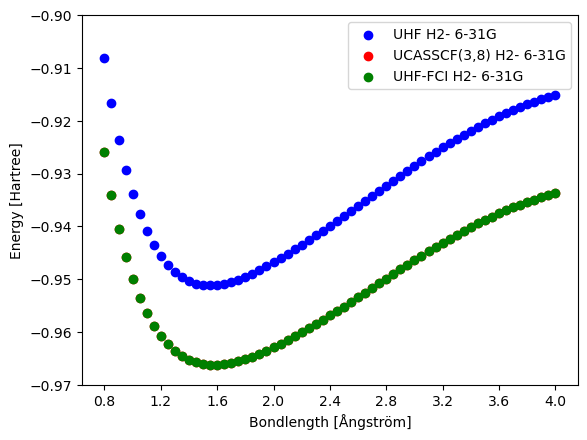

In [16]:
x = np.arange(0.8, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x, Euhf_H2, color='blue', label='UHF H2- 6-31G')
ax.scatter(x, Eucas_H2, color='red', label='UCASSCF(3,8) H2- 6-31G')
ax.scatter(x, Efci_H2, color='green', label='UHF-FCI H2- 6-31G')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.8, 4.4, 0.4))
ax.set_yticks(np.arange(-0.9, -0.98, -0.01))

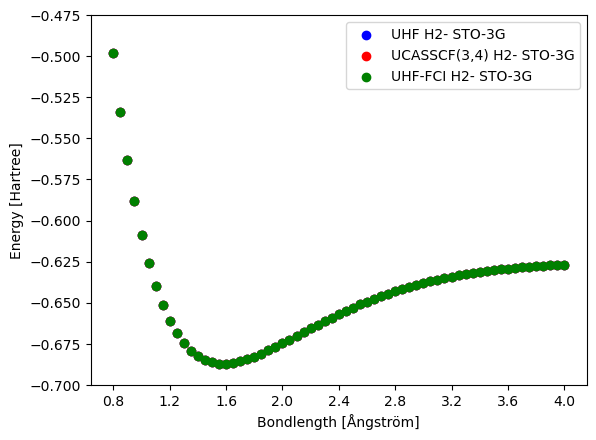

In [21]:
x2 = np.arange(0.8, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x2, Euhfs_H2, color='blue', label='UHF H2- STO-3G')
ax.scatter(x2, Eucass_H2, color='red', label='UCASSCF(3,4) H2- STO-3G')
ax.scatter(x2, Efcis_H2, color='green', label='UHF-FCI H2- STO-3G')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.8, 4.4, 0.4))
ax.set_yticks(np.arange(-0.475, -0.725, -0.025))

let's do the same for h3 triangular

In [20]:
Euhfs_H3tri = []
Eucass_H3tri = []
Efcis_H3tri = []
mo = None
ncas, nelecas = (3, (2, 1))
for b in np.arange(0.5, 4.05, 0.05):
    H3tri = gto.M(atom=[["H", 0, 0, 0],
                          ["H", 0.87, 0, 0], 
                          ["H", 0.435, b, 0]], basis = 'sto-3g', charge = 0, spin = 1)
    uhf =scf.UHF(H3tri)
    Euhfs_H3tri.append(uhf.kernel())
    ucas = mcscf.UCASSCF(uhf, ncas, nelecas)
    if mo is not None:
        mo = mcscf.project_init_guess(ucas, mo)
    Eucass_H3tri.append(ucas.mc1step(mo)[0])
    fcisolver = fci.FCI(uhf)
    Efcis_H3tri.append(fcisolver.kernel()[0])

converged SCF energy = -1.24523035744676  <S^2> = 0.76320501  2S+1 = 2.0131617
UCASSCF energy = -1.26134579480447
UCASCI E = -1.26134579480447  E(CI) = -3.46653179900722  S^2 = 0.7500000
converged SCF energy = -1.26001126892952  <S^2> = 0.76649939  2S+1 = 2.0164319
UCASSCF energy = -1.27750725850899
UCASCI E = -1.27750725850899  E(CI) = -3.39503750674721  S^2 = 0.7500000
converged SCF energy = -1.2692013547996  <S^2> = 0.7707247  2S+1 = 2.0206184
UCASSCF energy = -1.28816443364169
UCASCI E = -1.28816443364169  E(CI) = -3.32450542258965  S^2 = 0.7500000
converged SCF energy = -1.27357718499985  <S^2> = 0.7761742  2S+1 = 2.0260051
UCASSCF energy = -1.29408461250414
UCASCI E = -1.29408461250414  E(CI) = -3.25550631478852  S^2 = 0.7500000
converged SCF energy = -1.27393014648718  <S^2> = 0.78324569  2S+1 = 2.0329739
UCASSCF energy = -1.29604568358624
UCASCI E = -1.29604568358624  E(CI) = -3.18847060703704  S^2 = 0.7500000
converged SCF energy = -1.27101115105626  <S^2> = 0.79249007  2S+1 =

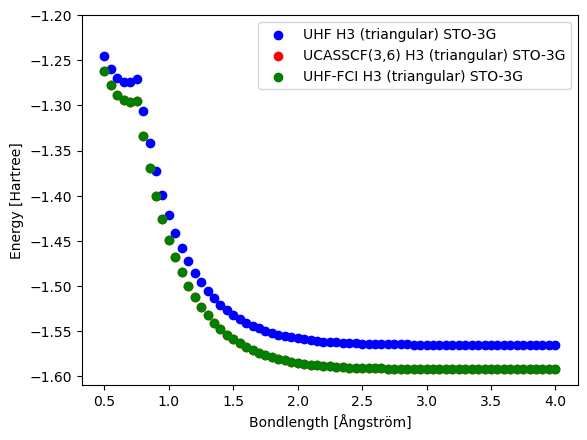

In [23]:
x3 = np.arange(0.5, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x3, Euhfs_H3tri, color='blue', label='UHF H3 (triangular) STO-3G')
ax.scatter(x3, Eucass_H3tri, color='red', label='UCASSCF(3,6) H3 (triangular) STO-3G')
ax.scatter(x3, Efcis_H3tri, color='green', label='UHF-FCI H3 (triangular) STO-3G')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.5, 4.5, 0.5))
ax.set_yticks(np.arange(-1.2, -1.65, -0.05))

let's do this again for 6-31g

In [24]:
Euhf_H3tri = []
Eucas_H3tri = []
Efci_H3tri = []
mo = None
ncas, nelecas = (6, (2, 1))
for b in np.arange(0.5, 4.05, 0.05):
    H3tri = gto.M(atom=[["H", 0, 0, 0],
                          ["H", 0.87, 0, 0], 
                          ["H", 0.435, b, 0]], basis = '6-31g', charge = 0, spin = 1)
    uhf =scf.UHF(H3tri)
    Euhf_H3tri.append(uhf.kernel())
    ucas = mcscf.UCASSCF(uhf, ncas, nelecas)
    if mo is not None:
        mo = mcscf.project_init_guess(ucas, mo)
    Eucas_H3tri.append(ucas.mc1step(mo)[0])
    fcisolver = fci.FCI(uhf)
    Efci_H3tri.append(fcisolver.kernel()[0])



converged SCF energy = -1.44067456696712  <S^2> = 0.75541139  2S+1 = 2.0054041
UCASSCF energy = -1.46745107040299
UCASCI E = -1.46745107040299  E(CI) = -3.67263707460575  S^2 = 0.7500000
converged SCF energy = -1.45460300051419  <S^2> = 0.75634468  2S+1 = 2.0063347
UCASSCF energy = -1.48207144178118
UCASCI E = -1.48207144178118  E(CI) = -3.5996016900194  S^2 = 0.7500000
converged SCF energy = -1.46341704751163  <S^2> = 0.75754373  2S+1 = 2.0075296
UCASSCF energy = -1.49162487623064
UCASCI E = -1.49162487623064  E(CI) = -3.5279658651786  S^2 = 0.7500000
converged SCF energy = -1.46784579299386  <S^2> = 0.7590967  2S+1 = 2.0090761
UCASSCF energy = -1.49683617264215
UCASCI E = -1.49683617264215  E(CI) = -3.45825787492653  S^2 = 0.7500000
converged SCF energy = -1.46861911034733  <S^2> = 0.76112745  2S+1 = 2.0110967
UCASSCF energy = -1.49843113731903
UCASCI E = -1.49843113731903  E(CI) = -3.39085606076983  S^2 = 0.7500000
converged SCF energy = -1.46642178365003  <S^2> = 0.76381166  2S+1 =

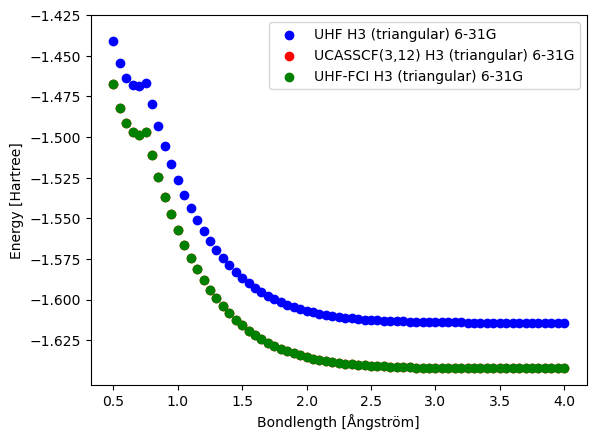

In [26]:
x4 = np.arange(0.5, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x4, Euhf_H3tri, color='blue', label='UHF H3 (triangular) 6-31G')
ax.scatter(x4, Eucas_H3tri, color='red', label='UCASSCF(3,12) H3 (triangular) 6-31G')
ax.scatter(x4, Efci_H3tri, color='green', label='UHF-FCI H3 (triangular) 6-31G')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.5, 4.5, 0.5))
ax.set_yticks(np.arange(-1.425, -1.65, -0.025))

Let's do the same for my problem child (H3 linear)

In [3]:
Euhfs_H3lin = []
Eucass_H3lin = []
Efcis_H3lin = []
mo = None
ncas, nelecas = (3, (2, 1))
for c in np.arange(0.5, 1.75, 0.05):
    H3lin = gto.M(atom=[["H", 0, 0, 0],
                          ["H", c, 0, 0], 
                          ["H", -c, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1)
    uhf =scf.UHF(H3lin)
    Euhfs_H3lin.append(uhf.kernel())
    ucas = mcscf.UCASSCF(uhf, ncas, nelecas)
    if mo is not None:
        mo = mcscf.project_init_guess(ucas, mo)
    Eucass_H3lin.append(ucas.mc1step(mo)[0])
    fcisolver = fci.FCI(uhf)
    Efcis_H3lin.append(fcisolver.kernel()[0])

converged SCF energy = -1.16083576357379  <S^2> = 0.7537449  2S+1 = 2.0037414
UCASSCF energy = -1.1705324308485
UCASCI E = -1.1705324308485  E(CI) = -3.8164184854485  S^2 = 0.7500000
converged SCF energy = -1.28595114173006  <S^2> = 0.75510758  2S+1 = 2.0051011
UCASSCF energy = -1.29699764321739
UCASCI E = -1.29699764321739  E(CI) = -3.70234860194466  S^2 = 0.7500000
converged SCF energy = -1.37581701709252  <S^2> = 0.75688024  2S+1 = 2.0068685
UCASSCF energy = -1.38831504152483
UCASCI E = -1.38831504152483  E(CI) = -3.59322008702483  S^2 = 0.7500000
converged SCF energy = -1.43974383516811  <S^2> = 0.75916766  2S+1 = 2.0091467
UCASSCF energy = -1.45378887598454
UCASCI E = -1.45378887598454  E(CI) = -3.48908584106146  S^2 = 0.7500000
converged SCF energy = -1.48425406156397  <S^2> = 0.76210599  2S+1 = 2.0120696
UCASSCF energy = -1.4999370143949
UCASCI E = -1.4999370143949  E(CI) = -3.38985562482348  S^2 = 0.7500000
converged SCF energy = -1.51409740661877  <S^2> = 0.76587253  2S+1 = 2.

In [6]:
H3_lin_17 = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 1.7, 0, 0], 
                     ["H", -1.7, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1)
mf17= scf.UHF(H3_lin_17).run()
dm_init_guess= mf17.make_rdm1()

Euhf_part2 = []
Eucas_part2 = []
Eufci_part2 = []
Euhf_631g_part2 = []
Eucas_631g_part2 = []
mo2 = None
ncas, nelecas = (3, (2, 1))
for c in np.arange(1.75, 4.05, 0.05 ):
    H3_lin_2 = gto.M(atom=[["H", 0, 0, 0],
                     ["H", c, 0, 0], 
                     ["H", -c, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1)
    mf2 = scf.UHF(H3_lin_2)
    Euhf_part2.append(mf2.kernel(dm_init_guess))
    mc2 = mcscf.UCASSCF(mf2, ncas, nelecas)
    if mo2 is not None:
        mo2 = mcscf.project_init_guess(mc2, mo2)
    Eucas_part2.append(mc2.mc1step(mo)[0])
    fcisolver2 = fci.FCI(mf2)
    Eufci_part2.append(fcisolver2.kernel()[0])

converged SCF energy = -1.42275515759302  <S^2> = 1.4693546  2S+1 = 2.6224832


converged SCF energy = -1.41908551511823  <S^2> = 1.509927  2S+1 = 2.6532448
UCASSCF energy = -1.44023159783298
UCASCI E = -1.44023159783298  E(CI) = -2.19619904200441  S^2 = 0.7500000
converged SCF energy = -1.41598417243265  <S^2> = 1.545353  2S+1 = 2.6798157
UCASSCF energy = -1.43480223625405
UCASCI E = -1.43480223625405  E(CI) = -2.16977058475405  S^2 = 0.7500000
converged SCF energy = -1.41337084632029  <S^2> = 1.5760436  2S+1 = 2.7026236
UCASSCF energy = -1.42998581462081
UCASCI E = -1.42998581462081  E(CI) = -2.14509015370189  S^2 = 0.7500000
converged SCF energy = -1.41117358780684  <S^2> = 1.6024754  2S+1 = 2.7221134
UCASSCF energy = -1.42574177702205
UCASCI E = -1.42574177702205  E(CI) = -2.12202758086416  S^2 = 0.7500000
converged SCF energy = -1.40932912324743  <S^2> = 1.6251359  2S+1 = 2.7387121
UCASSCF energy = -1.42202472284627
UCASCI E = -1.42202472284627  E(CI) = -2.10045704453857  S^2 = 0.7500000
converged SCF energy = -1.40778255304464  <S^2> = 1.6444871  2S+1 = 2.75

Let's get to plotting again

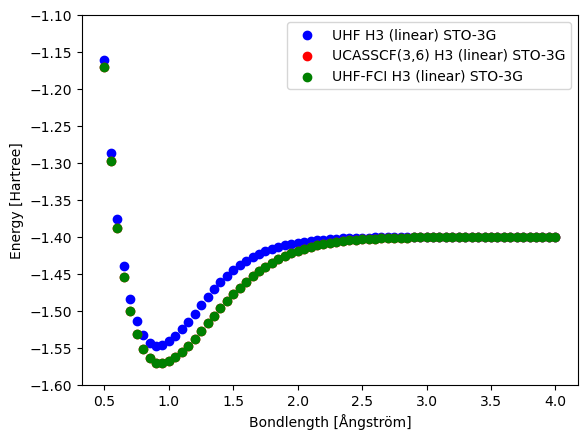

In [13]:
x = np.arange(0.5, 1.75, 0.05)
x2 = np.arange(1.75, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x, Euhfs_H3lin, color='blue', label='UHF H3 (linear) STO-3G')
ax.scatter(x2, Euhf_part2, color='blue')
ax.scatter(x, Eucass_H3lin, color='red', label='UCASSCF(3,6) H3 (linear) STO-3G')
ax.scatter(x2, Eucas_part2, color='red')
ax.scatter(x, Efcis_H3lin, color='green', label='UHF-FCI H3 (linear) STO-3G')
ax.scatter(x2, Eufci_part2, color='green')

ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.5, 4.5, 0.5))
ax.set_yticks(np.arange(-1.1, -1.65, -0.05))


In [8]:
Euhf6_H3lin = []
Eucas6_H3lin = []
Efci6_H3lin = []
mo = None
ncas, nelecas = (6, (2, 1))
for c in np.arange(0.5, 2.05, 0.05):
    H3lin = gto.M(atom=[["H", 0, 0, 0],
                          ["H", c, 0, 0], 
                          ["H", -c, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
    uhf =scf.UHF(H3lin)
    Euhf6_H3lin.append(uhf.kernel())
    ucas = mcscf.UCASSCF(uhf, ncas, nelecas)
    if mo is not None:
        mo = mcscf.project_init_guess(ucas, mo)
    Eucas6_H3lin.append(ucas.mc1step(mo)[0])
    fcisolver = fci.FCI(uhf)
    Efci6_H3lin.append(fcisolver.kernel()[0])

converged SCF energy = -1.30999235357524  <S^2> = 0.7544615  2S+1 = 2.0044565
UCASSCF energy = -1.335587882721
UCASCI E = -1.335587882721  E(CI) = -3.981473937321  S^2 = 0.7500000
converged SCF energy = -1.40153869070887  <S^2> = 0.75585671  2S+1 = 2.0058482
UCASSCF energy = -1.42802612324962
UCASCI E = -1.42802612324962  E(CI) = -3.83337708197689  S^2 = 0.7500000
converged SCF energy = -1.46704484420729  <S^2> = 0.75765438  2S+1 = 2.0076398
UCASSCF energy = -1.49423563177975
UCASCI E = -1.49423563177975  E(CI) = -3.69914067727975  S^2 = 0.7500000
converged SCF energy = -1.51370024404778  <S^2> = 0.75993568  2S+1 = 2.0099111
UCASSCF energy = -1.5414462836466
UCASCI E = -1.5414462836466  E(CI) = -3.57674324872352  S^2 = 0.7500000
converged SCF energy = -1.5464457232366  <S^2> = 0.76280051  2S+1 = 2.0127598
UCASSCF energy = -1.57463867159568
UCASCI E = -1.57463867159568  E(CI) = -3.46455728202425  S^2 = 0.7500000
converged SCF energy = -1.56878307929246  <S^2> = 0.76637908  2S+1 = 2.0163

In [11]:
H3_lin_200 = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 2.0, 0, 0], 
                     ["H", -2.0, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
mf20= scf.UHF(H3_lin_200).run()
dm_init_guess= mf20.make_rdm1()

Euhf6_part2 = []
Eucas6_part2 = []
Eufci6_part2 = []
mo2 = None

for c in np.arange(2.05, 4.05, 0.05 ):
    H3_lin_2 = gto.M(atom=[["H", 0, 0, 0],
                     ["H", c, 0, 0], 
                     ["H", -c, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
    mf2 = scf.UHF(H3_lin_2)
    Euhf6_part2.append(mf2.kernel(dm_init_guess))
    #ncas, nelecas = (6 (2, 1))
    mc2 = mcscf.UCASSCF(mf2, ncas, nelecas)
    if mo2 is not None:
        mo2 = mcscf.project_init_guess(mc2, mo2)
    Eucas6_part2.append(mc2.mc1step(mo)[0])
    fcisolver2 = fci.FCI(mf2)
    Eufci6_part2.append(fcisolver2.kernel()[0])

converged SCF energy = -1.50349866195382  <S^2> = 1.5700033  2S+1 = 2.6981499


converged SCF energy = -1.50222793397728  <S^2> = 1.5934197  2S+1 = 2.7154519
UCASSCF energy = -1.51397218366185
UCASCI E = -1.51397218366185  E(CI) = -2.15931024575941  S^2 = 0.7500000
converged SCF energy = -1.50113970797426  <S^2> = 1.6139963  2S+1 = 2.730565
UCASSCF energy = -1.51153424039959
UCASCI E = -1.51153424039959  E(CI) = -2.14150711054245  S^2 = 0.7500000
converged SCF energy = -1.50020901981131  <S^2> = 1.6320224  2S+1 = 2.7437364
UCASSCF energy = -1.50937086207996
UCASCI E = -1.50937086207996  E(CI) = -2.12469320035903  S^2 = 0.7500000
converged SCF energy = -1.49941397041935  <S^2> = 1.6477762  2S+1 = 2.7551959
UCASSCF energy = -1.50745940006688
UCASCI E = -1.50745940006688  E(CI) = -2.1087971397487  S^2 = 0.7500000
converged SCF energy = -1.49873544672038  <S^2> = 1.6615167  2S+1 = 2.7651522
UCASSCF energy = -1.50577718826769
UCASCI E = -1.50577718826769  E(CI) = -2.09375186706769  S^2 = 0.7500000
converged SCF energy = -1.49815683550634  <S^2> = 1.6734811  2S+1 = 2.77

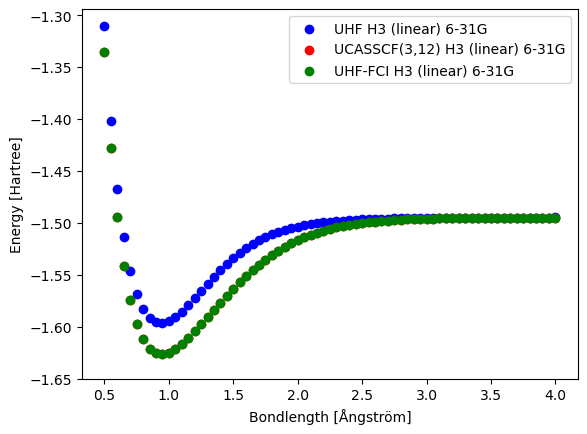

In [15]:
x3 = np.arange(0.5, 2.05, 0.05)
x4 = np.arange(2.05, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x3, Euhf6_H3lin, color='blue', label='UHF H3 (linear) 6-31G')
ax.scatter(x4, Euhf6_part2, color='blue')
ax.scatter(x3, Eucas6_H3lin, color='red', label='UCASSCF(3,12) H3 (linear) 6-31G')
ax.scatter(x4, Eucas6_part2, color='red')
ax.scatter(x3, Efci6_H3lin, color='green', label='UHF-FCI H3 (linear) 6-31G')
ax.scatter(x4, Eufci6_part2, color='green')

ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.5, 4.5, 0.5))
ax.set_yticks(np.arange(-1.3, -1.7, -0.05))